In [1]:
# Import basic libraries 
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import ADASYN 
from collections import Counter
import seaborn as sn

# plot functions
import plot_functions as pf

# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics

# settings
%matplotlib inline
sn.set_style("dark")
sn.set_palette("colorblind")

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


In [7]:
X = df.iloc[:, :-1]
y = df['Class']

In [8]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)

In [10]:
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = ada.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 190477, 1: 343})
Resampled dataset shape Counter({0: 190477, 1: 190471})


In [11]:
X_train, y_train = X_res, y_res 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);

In [12]:
# Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier),('LogisticRegression', LGR_Classifier),
('Naive Baiye Classifier', BNB_Classifier)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  93.0%

Model Accuracy:  100.0%

Confusion Matrix:
 [[190477      0]
 [     0 190471]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190477
           1       1.00      1.00      1.00    190471

    accuracy                           1.00    380948
   macro avg       1.00      1.00      1.00    380948
weighted avg       1.00      1.00      1.00    380948


===== LogisticRegression =====

Cross Validation Mean Score:  87.4%

Model Accuracy:  90.10000000000001%

Confusion Matrix:
 [[174116  16361]
 [ 21442 169029]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90    190477
           1       0.91      0.89      0.90    190471

    accuracy                           0.90    380948
   macro avg


========================== Model Test Results ========================

=== RandomForest Classifier ===
Model Accuracy:  100.0%

Confusion Matrix:
 [[93819    19]
 [   25   124]]



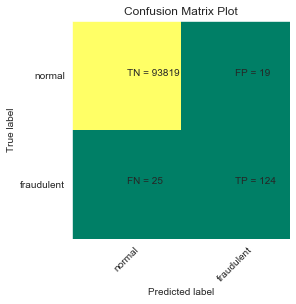


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.83      0.85       149

    accuracy                           1.00     93987
   macro avg       0.93      0.92      0.92     93987
weighted avg       1.00      1.00      1.00     93987


=== LogisticRegression ===
Model Accuracy:  91.2%

Confusion Matrix:
 [[85614  8224]
 [    7   142]]



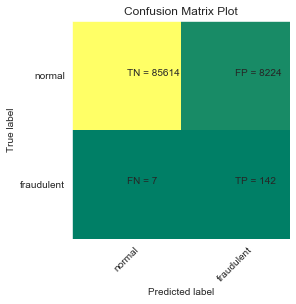


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     93838
           1       0.02      0.95      0.03       149

    accuracy                           0.91     93987
   macro avg       0.51      0.93      0.49     93987
weighted avg       1.00      0.91      0.95     93987


=== Naive Baiye Classifier ===
Model Accuracy:  89.4%

Confusion Matrix:
 [[83873  9965]
 [   10   139]]



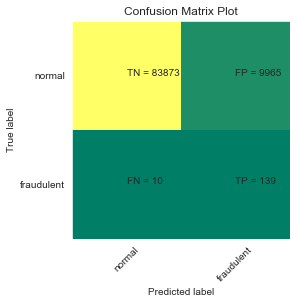


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     93838
           1       0.01      0.93      0.03       149

    accuracy                           0.89     93987
   macro avg       0.51      0.91      0.49     93987
weighted avg       1.00      0.89      0.94     93987


============================= ROC Curve ===============================



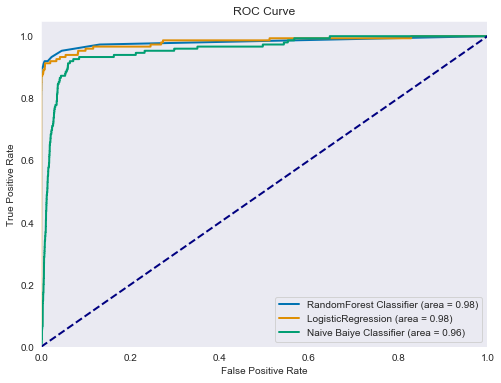

In [13]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   

for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    pf.plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n")      
pf.plot_roc_auc(arg1=models, arg2=X_test, arg3=y_test)